In [143]:
import numpy as np
import math
from matplotlib import cm
import pandas as pd
import scipy as sp
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib as matlib
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('week2.csv', skiprows=[0], header = None,keep_default_na=False)
df.columns = ["x_1","x_2","y"]
Xtest = df.iloc[:,0:2]
X1=df.iloc[:,0]
X2=df.iloc[:,1]
classifier=df.iloc[:,2]
X=np.column_stack((X1,X2))
colors = np.where(df["y"]==1,'blue','green')
plt.rc('font', size =16)
df.isnull();







[-1]
[[-0.27441454 -5.54101844]]
[-1.73749771]
2
[-1  1]
-1.737497713252489
0.0006897329117428881
[-1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1 -1  1 -1  1 -1  1  1
  1  1  1 -1  1 -1 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1  1 -1 -1  1  1 -1
 -1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1
  1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1
 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1
 -1  1 -1 -1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1
 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1  1 -1
  1 -1  1 -1  1  1 -1  1 -1  1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1  1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1  1 -1  1 -1 -1  1 -1
 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1  1  1 -1  1 -1  1  1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  

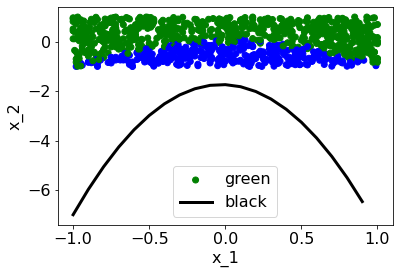

In [144]:
from unittest import result


model = LogisticRegression(penalty="none", solver='lbfgs').fit(X,classifier)
#fitted_model = model.fit(X, classifier)

# Predict
prediction_result = model.predict([(0.1,0.5)])
print(prediction_result)
print(model.coef_)
print(model.intercept_)
print(model.n_features_in_)
print(model.classes_)

xValues = model.predict([(0.1,0.5)])

def logitFunction(x1,x2):
    formula = model.intercept_[0] + model.coef_[0,0]*x1 + model.coef_[0,1]*x2
    return formula
    
def probFunction(x1,x2):
    result = 1/(1+np.exp(-1*logitFunction(x1,x2)))
    return result
    
print(logitFunction(0,0))
print(probFunction(0,1))


def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    
#best_fit_y = fitted_model[0][0]*X1 + fitted_model[0][1] #first index takes fit params, second specifies
#plt.plot(X1,X2,'.')
yvals = np.arange(-1,1,0.1)
#plt.plot(X1,yvals,'.')



a=[]
b=[]
for x in np.arange(-1.0,1.0,0.1):
    y = model.intercept_ + model.coef_[0,0]*x + model.coef_[0,1]*x**2
    a.append(x)
    b.append(y)
    
ytrain =np.sign(X1)

ypred = model.predict(X)#he is predicting just the Y data and so can draw the graph. I need to calculate the Y with the corresponding highest probability, and then pred
print(ypred)
#axes=fig.add_subplot(111)
plt.scatter(X1,X2, c = colors)
plt.plot(a,b, linewidth =3, color = "black")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(["green","black","blue"])
plt.show()

    
